# Imports

In [1]:
# Memory Management 
import psutil 
import gc

import os 

# Manipulation
import numpy as np
import pandas as pd 

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Sampling, Scaling and Splitting
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Models 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Hyperparameter testing
from sklearn.model_selection import GridSearchCV

# Evaluation Metrics
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, precision_score, recall_score

# Data Importing 

In [2]:
data_path = os.getcwd() + "\data\\"
print(data_path)

C:\Users\James\Documents\Coursework\UCD - ML\data\


In [ ]:
TRAIN_DATASET_PATH = data_path + "train_dataset.csv"
TEST_DATASET_PATH = data_path + "test_dataset.csv"

train_df = pd.read_csv(TRAIN_DATASET_PATH)
test_df = pd.read_csv(TEST_DATASET_PATH)

# Data Processing & EDA 

## Initial look at the data

In [5]:
# To start with lets look at first 5 values in the training dataset
train_df.head(5)

,url,label,source,url_has_login,url_has_client,url_has_server,url_has_admin,url_has_ip,url_isshorted,url_len,...,pdomain_count_hyphen,pdomain_count_atrate,pdomain_count_non_alphanum,pdomain_count_digit,tld_len,tld,tld_is_sus,pdomain_min_distance,subdomain_len,subdomain_count_dot
0,irs-profilepaymentservice.com/home,1,phishtank,0,0,0,0,0,0,34,...,0,0,0,0,3,com,0,17,0,0
1,cpuggsukabumi.id,0,majestic_million,0,0,0,0,0,0,16,...,0,0,0,0,2,id,1,10,0,0
2,members.tripod.com/~don_rc/ring.htm,0,data_clean_test_mendel,0,0,0,0,0,0,35,...,0,0,0,0,3,com,0,2,7,0
3,optuswebmailadminprovider.weebly.com/,1,phishtank,0,0,0,1,0,0,37,...,0,0,0,0,3,com,0,3,25,0
4,topoz.com.pl,0,dmoz_harvard,0,0,0,0,0,0,12,...,0,0,0,0,6,com.pl,0,3,0,0


In [118]:
def get_sources(df):
    ''' returns the unique sources of the URLs in the dataframe'''
    return df.source.unique()

In [119]:
def get_shape(df): 
    ''' returns the total number of rows and columns in the dataframe'''
    return [df.shape[0],df.shape[1]]

In [120]:
print(f"Training Sources: {get_sources(train_df)}")
print(f"Training Shape: {get_shape(train_df)}")
print(f"Test Sources: {get_sources(test_df)}")
print(f"Test Shape: {get_shape(test_df)}")

Training Sources: ['phishtank' 'majestic_million' 'data_clean_test_mendel' 'dmoz_harvard'
 'data_clean_train_mendel' 'alexatop1m' 'domcop' 'ALL-phishing-domains'
 'tranco_K2K4W' 'ALL-phishing-links' 'manual' 'aa419' 'openphish'
 'top500Domains']
Training Shape: [6728848, 60]
Test Sources: ['dmoz_harvard' 'majestic_million' 'alexatop1m' 'data_clean_train_mendel'
 'ALL-phishing-domains' 'domcop' 'ALL-phishing-links' 'phishtank'
 'tranco_K2K4W' 'data_clean_test_mendel' 'aa419' 'manual' 'openphish']
Test Shape: [1682213, 60]


**Comment:**
We now know the two datasets contain the same number of columns and are sourced from some of the same locations

## Validating Data Types

In [121]:
def print_datatypes(df, title): 
    print(title)
    print(df.info())
    print("\n")
    return

In [122]:
print_datatypes(train_df, "Training Dataframe Datatypes:")
print_datatypes(test_df, "Test Dataframe Datatypes:")

Training Dataframe Datatypes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6728848 entries, 0 to 6728847
Data columns (total 60 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   url                                  object 
 1   label                                int64  
 2   source                               object 
 3   url_has_login                        int64  
 4   url_has_client                       int64  
 5   url_has_server                       int64  
 6   url_has_admin                        int64  
 7   url_has_ip                           int64  
 8   url_isshorted                        int64  
 9   url_len                              int64  
 10  url_entropy                          float64
 11  url_hamming_1                        float64
 12  url_hamming_00                       float64
 13  url_hamming_10                       float64
 14  url_hamming_01                       float64
 15  ur

**Comment:**
Upon investigation it appears the datatypes associated with each of the column is consistent between the two dataframes. 
Also the datatypes assigned to each column is correct, where all count or length columns are integers, boolean values like "url_has_login" or "tld_is_sus" are integer datatypes as well as ratios and entropies being floats 

## Finding and Removing Null Values 
In this section we will use the .isna() and .sum() method to find any columns which have missing values in both datasets 

In [123]:
def find_null_values(df):
    return df.isna().sum()

In [124]:
print(f"Training Dataframe: \n{find_null_values(train_df)}")
print(f"\nTest Dataframe: \n{find_null_values(test_df)}")

Training Dataframe: 
url                                    0
label                                  0
source                                 0
url_has_login                          0
url_has_client                         0
url_has_server                         0
url_has_admin                          0
url_has_ip                             0
url_isshorted                          0
url_len                                0
url_entropy                            0
url_hamming_1                          0
url_hamming_00                         0
url_hamming_10                         0
url_hamming_01                         0
url_hamming_11                         0
url_2bentropy                          0
url_3bentropy                          0
url_count_dot                          0
url_count_https                        0
url_count_http                         0
url_count_perc                         0
url_count_hyphen                       0
url_count_www                       

**Comment:**
There are no null/empty values present in our datasets so removing them is not needed

## Finding duplicate values 

In [125]:
def find_duplicates(df,col):
    '''This functions searches for duplicate entries in a Series using the dataframe and column passed to it'''
    duplicate_rows = df.loc[df.duplicated(subset=[col])]
    return duplicate_rows

In [126]:
# First we'll want to find out if there are duplicate URLs in each dataset
print(f"Training duplicates: {len(find_duplicates(train_df,'url'))}")
print(f"Test duplicates: {len(find_duplicates(test_df,'url'))}")

Training duplicates: 0
Test duplicates: 0


**Comment:** No duplicates found in the individual dataframes

In [127]:
# Now we will want to find any duplicates between the datasets
df_merge = pd.concat([train_df, test_df])
df_merge['Duplicated'] = df_merge.duplicated(keep=False)
df_duplicate = df_merge.loc[df_merge['Duplicated']==True]
print(df_duplicate)

Empty DataFrame
Columns: [url, label, source, url_has_login, url_has_client, url_has_server, url_has_admin, url_has_ip, url_isshorted, url_len, url_entropy, url_hamming_1, url_hamming_00, url_hamming_10, url_hamming_01, url_hamming_11, url_2bentropy, url_3bentropy, url_count_dot, url_count_https, url_count_http, url_count_perc, url_count_hyphen, url_count_www, url_count_atrate, url_count_hash, url_count_semicolon, url_count_underscore, url_count_ques, url_count_equal, url_count_amp, url_count_letter, url_count_digit, url_count_sensitive_financial_words, url_count_sensitive_words, url_nunique_chars_ratio, path_len, path_count_no_of_dir, path_count_no_of_embed, path_count_zero, path_count_pertwent, path_has_any_sensitive_words, path_count_lower, path_count_upper, path_count_nonascii, path_has_singlechardir, path_has_upperdir, query_len, query_count_components, pdomain_len, pdomain_count_hyphen, pdomain_count_atrate, pdomain_count_non_alphanum, pdomain_count_digit, tld_len, tld, tld_is_su

**Comment:** No duplicates found between the two datasets 

**Comment:** We will use df_merge going forward so that all data is part of the data processing

In [128]:
# To recover some memory we can delete train_df and test_df
print(psutil.virtual_memory().available * 100 / psutil.virtual_memory().total)
lst = [train_df, test_df]
del train_df
del test_df
del lst
print(psutil.virtual_memory().available * 100 / psutil.virtual_memory().total)

30.710566585543503
30.657298821378863


## Target & Feature definition

In [129]:
features = list(df_merge.select_dtypes(include=['int64','float64']).columns)
features = list(filter(('label').__ne__, features))

target = ['label']

MemoryError: Unable to allocate 3.01 GiB for an array with shape (48, 8411061) and data type int64

## Finding Outliers 

In [ ]:
# The main feature to focus our attention on when investigating outliers is the "url_len"
boxplot_with_outs = sns.catplot(data=df_merge, x="label", y="url_len", hue="label", kind="box")
fig_name = f"url-len-boxplot.png"
plt.savefig(fig_name) 

**Comment:** Looking at the above plot it is clear to see we have a large number of outliers 

In [ ]:
# To better understand this we can use the describe function to see the percentiles 
df_merge["url_len"].describe().round(2)

In [ ]:
def find_outliers(df):
    Q1 = df["url_len"].quantile(0.25)
    Q3 = df["url_len"].quantile(0.75)
    IQR = Q3 - Q1

    fence_low = Q1 - (1.5*IQR)
    print(f"fence_low: {fence_low}")
    fence_high = Q3 + (1.5*IQR)
    print(f"fence_high: {fence_high}")
    
    df_out = df.loc[(df["url_len"] > fence_low) & (df["url_len"] < fence_high)]
    return df_out

In [ ]:
df_out = find_outliers(df_merge)
df_out["url_len"].describe().round(2)

In [ ]:
df_merge.shape

In [ ]:
df_out.shape

In [ ]:
boxplot = sns.catplot(data=df_out, x="label", y="url_len", hue="label", kind="box")
fig_name = f"url-len-boxplot-post.png"
plt.savefig(fig_name) 

**Comment:** We have now removed outliers with long URL lengths 

**Comment:** Going forward we will use the df_out dataframe as it contains the processed data

In [ ]:
#  To free upsome memory we can now remove df_merge
print(psutil.virtual_memory().available * 100 / psutil.virtual_memory().total)
lst = [df_merge]
del df_merge
del lst
print(psutil.virtual_memory().available * 100 / psutil.virtual_memory().total)

## Investigating the Target

In [ ]:
def print_col_counts(df,col):
    return df.value_counts(col)

In [ ]:
# Let's now look at the amount of Malicious and Benign URLs using the "label" column in the training dataframe 
print(f"{print_col_counts(df_out,'label')}")

**Comment:**
It appears the amount of Malicious and Benign URLs is uneven in both our dataset. To allow for this we made need to oversample/undersample one group

In [ ]:
def generate_pie_chart(df, target_col, title):
    fig, ax = plt.subplots()
    plt.title(title)
    ax.pie(df.value_counts(target_col), labels=df.value_counts(target_col).index, autopct='%1.1f%%')
    fig_name = f"target_breakdown.png"
    fig.savefig(fig_name)
    plt.show()

In [ ]:
# We should plot the breakdown Malicious and Benign URLs in the dataset to better understand the difference in target groups
generate_pie_chart(df_out, 'label', "% Target Breakdown")


**Comment:**

It appears the amount of Malicious and Benign URLs is uneven in both our Training data and our Test data. To allow for this we made need to oversample the malicious group or undersample the benign group

In [ ]:
plt.close()

### Correlation between features and target

In [ ]:
df_out.select_dtypes(include=['int64','float64']).corr()["label"].sort_values()

**Comment:** This provides us with a rough understanding of the relationship between the features and our target
48 of the features in the dataset have a correlation coefficient between -0.3 and 0.3. This indicates that these features have weak linear relationship with the target

"pdomain_count_atrate" oddly contains a NaN value which needs further investigation

7 features have a moderate positive relationship with target "url_count_digit", "path_count_lower", "url_count_letter", "path_count_no_of_dir", "url_entropy", "subdomain_len", "url_len"


In [ ]:
# Looking at "pdomain_count_atrate": 
df_out["pdomain_count_atrate"].describe().round(2)

**Comment:** As this column contains only 0 values it can be dropped as it adds nothing to the dataset

In [ ]:
df_out.shape

In [ ]:
df_out = df_out.drop("pdomain_count_atrate", axis=1)

In [ ]:
df_out.shape

In [ ]:
def plot_target_feature_relationship(df, target_col, cols, type): 
    for col in cols:
        fig = sns.catplot(x=target_col, y=col, data=df, \
                    kind=type, \
                    hue=target_col)
        fig_name = f"{type}-{col}.png"
        fig.savefig(fig_name) 

In [ ]:
plot_target_feature_relationship(\
    df_out, \
    'label', \
    ["url_count_digit", "path_count_lower", "url_count_letter", "path_count_no_of_dir", "url_entropy", "subdomain_len", "url_len"],\
    "violin")

In [ ]:
plt.close()

In [ ]:
print(psutil.virtual_memory().available * 100 / psutil.virtual_memory().total)
gc.collect()
print(psutil.virtual_memory().available * 100 / psutil.virtual_memory().total)

## Categorical Data

In [ ]:
def print_unique_counts(df, title):
    non_numeric = df.select_dtypes("object")
    print(title)
    for col in non_numeric.columns:
        print(f"Number of unique values in {col} column: ", non_numeric[col].nunique())

In [ ]:
print_unique_counts(df_out, "Object Data: ")

**Comment:** These will not be used with the model 

In [ ]:
df_out.shape

In [ ]:
object_cols = list(df_out.select_dtypes("object"))
df_out = df_out.drop(object_cols, axis=1)

In [ ]:
df_out.shape

In [ ]:
print(psutil.virtual_memory().available * 100 / psutil.virtual_memory().total)
gc.collect()
print(psutil.virtual_memory().available * 100 / psutil.virtual_memory().total)

## Boolean Feature 

In [ ]:
# These features were identified by looking through the information returned by .head()
boolean_features= ["label","url_has_login","url_has_client","url_has_server","url_has_admin","url_has_ip","url_isshorted","path_has_any_sensitive_words","path_has_singlechardir","path_has_upperdir","tld_is_sus" ]

In [ ]:
def filter_and_add_label_col(col_group):
    # To stop multiple 'label' entries in the list filter all entries of it 
    col_group = list(filter(('label').__ne__, col_group))

    # If no 'label' present at the start add label so we can group by it 
    if col_group[0] != 'label':
        col_group.insert(0, 'label')
    return col_group

In [ ]:
def generate_bar_graph(df, col_group, agg_type, bar_color):
    ''' funtion is used to create simple matplotlib bar charts '''
    col_group = filter_and_add_label_col(col_group)
    plt.cla()
    
    for feature in col_group[1:]:
        if agg_type.lower() == 'median': 
             ax = df[col_group].groupby('label')[feature].median().plot(kind='bar', title =feature, figsize=(4, 2), legend=False, fontsize=12, color=bar_color)
        else:   
             ax = df[col_group].groupby('label')[feature].mean().plot(kind='bar', title =feature, figsize=(4, 2), legend=False, fontsize=12, color=bar_color)
        ax.set_xlabel("Label", fontsize=12)
        ax.set_ylabel(agg_type, fontsize=12)
        fig_name = f"{feature}-{agg_type}.png"
        plt.savefig(fig_name) 
        plt.show()

In [ ]:
generate_bar_graph(df_out, boolean_features, 'Mean', 'blue')

In [ ]:
plt.close()

In [ ]:
print(psutil.virtual_memory().available * 100 / psutil.virtual_memory().total)
gc.collect()
print(psutil.virtual_memory().available * 100 / psutil.virtual_memory().total)

**Comment:** 
From the plots generated above it is clear to see the mean value for all boolean features is higher in the Malicious URL group 

## Count Features 

In [ ]:
# These features are found by looking for columns containing 'count' in the column name
count_features = [col for col in df_out.columns if 'count' in col and not 'has_' in col]
print(count_features)

In [ ]:
# These plots need to be limited to 3 features as using all of the features will crash Juypter due to a memory error
plot_target_feature_relationship(\
    df_out, \
    'label', \
    count_features[16:20], \
    "boxen")

In [ ]:
plt.close()

In [ ]:
print(psutil.virtual_memory().available * 100 / psutil.virtual_memory().total)
gc.collect()
print(psutil.virtual_memory().available * 100 / psutil.virtual_memory().total)

## Length Features

In [ ]:
# These features are found by looking for columns containing 'len' in the column name
len_features = [col for col in df_out.columns if 'len' in col]

In [ ]:
# These plots need to be limited to 3 columns as using all of the columns will crash Juypter due to a memory error
plot_target_feature_relationship(\
    df_out, \
    'label', \
    len_features[0:3], \
    "boxen")

In [ ]:
plt.close()

In [ ]:
print(psutil.virtual_memory().available * 100 / psutil.virtual_memory().total)
gc.collect()
print(psutil.virtual_memory().available * 100 / psutil.virtual_memory().total)

## Feature Selection

In [ ]:
def generate_corr_matix(df, col_group): 
    correlation_matrix = df[col_group].corr()
    return correlation_matrix

In [ ]:
def filter_corr_matix(cm, lower_bound, upper_bound):
    filtered_correlations = cm[(cm <= lower_bound) | (cm >= upper_bound)]
    return filtered_correlations

In [131]:
def plot_corr_matrix(filtered_correlation_matrix, title, size):
    plt.figure(figsize=size)
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    sns.heatmap(filtered_correlation_matrix, annot=True, cmap=cmap, center=0)
    plt.title(title)
    fig_name = f"{title}.png"
    plt.savefig(fig_name) 
    plt.show()

In [ ]:
cm_features = generate_corr_matix(df_out, df_out.columns)
filter_cm_features = filter_corr_matix(cm_features, -0.7, 0.7)
plot_corr_matrix(filter_cm_features, "Heatmap of Highly pos or neg Correlated Features", (50,25))

In [ ]:
plt.close()

In [ ]:
print(psutil.virtual_memory().available * 100 / psutil.virtual_memory().total)
gc.collect()
print(psutil.virtual_memory().available * 100 / psutil.virtual_memory().total)

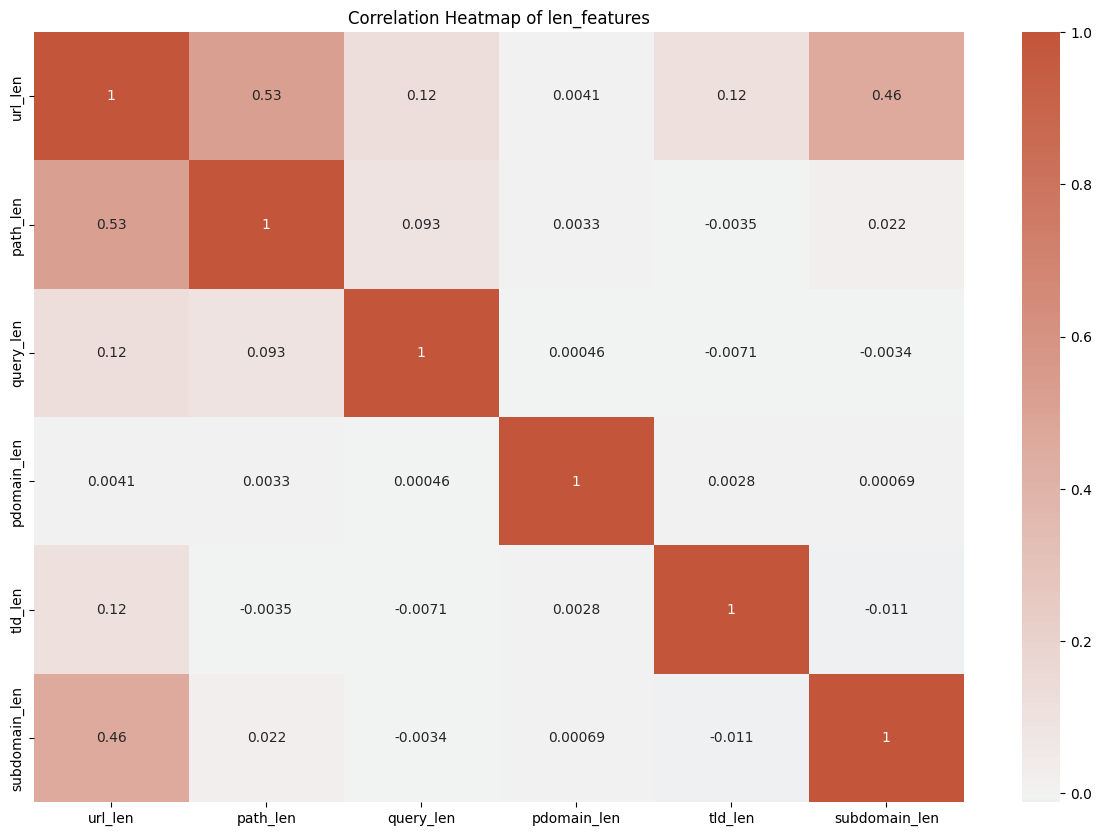

In [135]:
cm_len_features = generate_corr_matix(df_out, len_features)
filter_cm_len_features = filter_corr_matix(cm_len_features, 0, 0)
plot_corr_matrix(filter_cm_len_features, "Correlation Heatmap of len_features", (15,10))

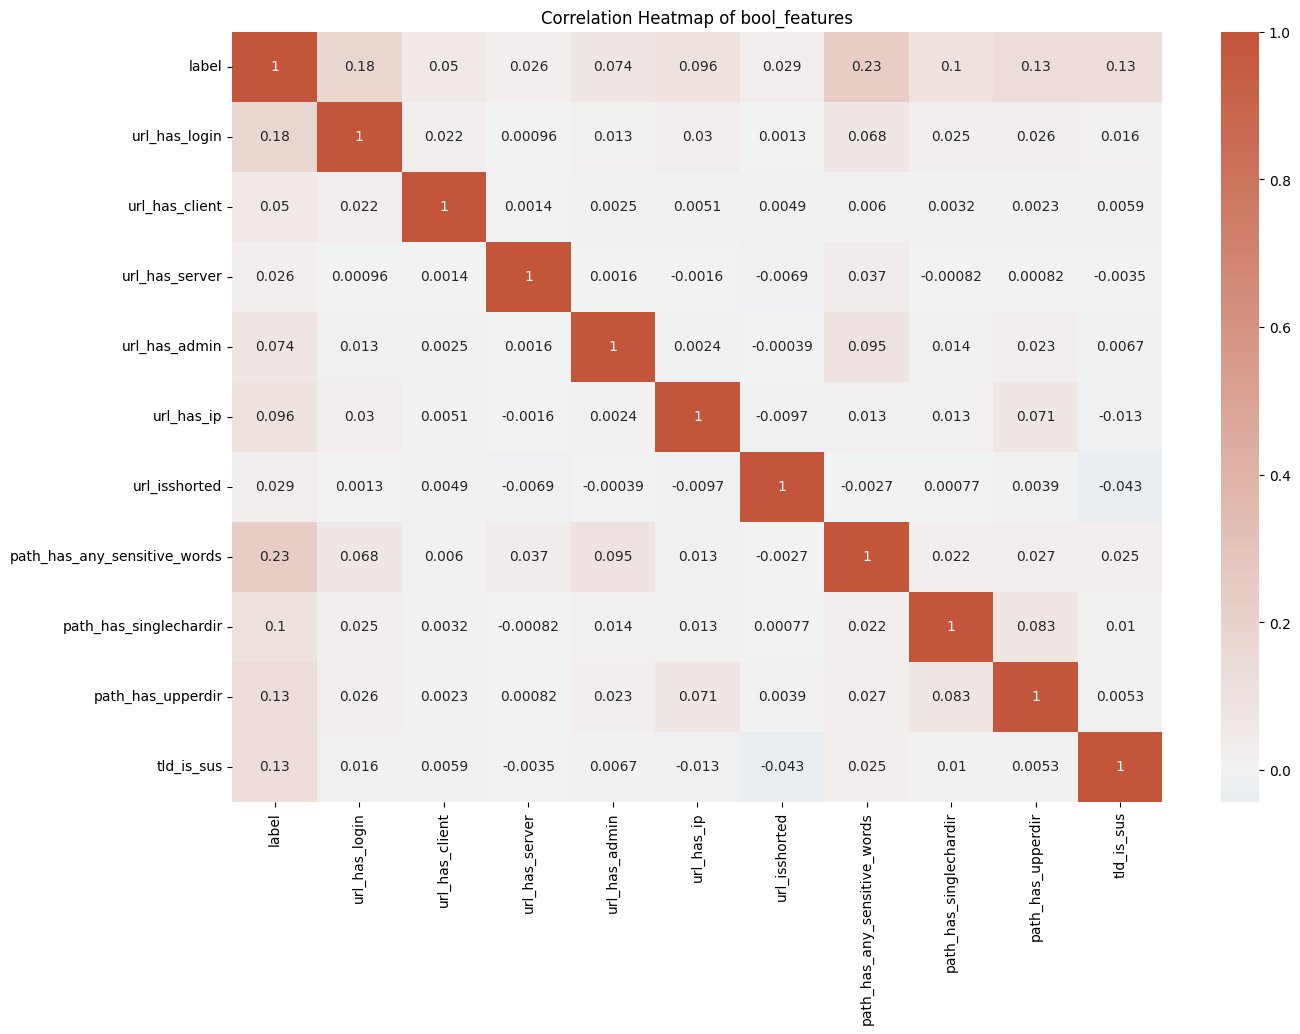

In [134]:
cm_bool_features = generate_corr_matix(df_out, boolean_features)
filter_cm_bool_features = filter_corr_matix(cm_bool_features, 0, 0)
plot_corr_matrix(filter_cm_bool_features, "Correlation Heatmap of bool_features", (15,10))

In [1]:
#cm_count_features = generate_corr_matix(df_out, count_features)
#filter_cm_count_features = filter_corr_matix(cm_count_features, 0, 0)
#plot_corr_matrix(filter_cm_count_features, "Correlation Heatmap of count_features", (15,10))

## Sampling

In [64]:
try:
    df_out = df_out.drop(['Duplicated'],axis=1)
except Exception:
    print("Duplicated column not found")

target = 'label'

In [65]:
X = df_out.drop(['label'],axis=1)
print(f"X Shape: {X.shape}")
y = df_out['label']
print(f"y Shape: {y.shape}")
print(f"{print_col_counts(y,'label')}")

X Shape: (7758227, 55)
y Shape: (7758227,)
label
0    0.827678
1    0.172322
Name: proportion, dtype: float64


In [66]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: label, dtype: int64

In [67]:
rus = RandomUnderSampler(sampling_strategy=1)
X_resampled, y_resampled = rus.fit_resample(X, y)
print(f"X Shape: {X_resampled.shape}")
print(f"y Shape: {y_resampled.shape}")
print(f"{print_col_counts(y_resampled,'label')}")

X Shape: (2673824, 55)
y Shape: (2673824,)
label
0    0.5
1    0.5
Name: proportion, dtype: float64


**Comment:** Now we have a balanced dataset with an equal number of malicious and benign URLs

## Scaling

In [68]:
print(X_resampled.columns)

Index(['url_has_login', 'url_has_client', 'url_has_server', 'url_has_admin',
       'url_has_ip', 'url_isshorted', 'url_len', 'url_entropy',
       'url_hamming_1', 'url_hamming_00', 'url_hamming_10', 'url_hamming_01',
       'url_hamming_11', 'url_2bentropy', 'url_3bentropy', 'url_count_dot',
       'url_count_https', 'url_count_http', 'url_count_perc',
       'url_count_hyphen', 'url_count_www', 'url_count_atrate',
       'url_count_hash', 'url_count_semicolon', 'url_count_underscore',
       'url_count_ques', 'url_count_equal', 'url_count_amp',
       'url_count_letter', 'url_count_digit',
       'url_count_sensitive_financial_words', 'url_count_sensitive_words',
       'url_nunique_chars_ratio', 'path_len', 'path_count_no_of_dir',
       'path_count_no_of_embed', 'path_count_zero', 'path_count_pertwent',
       'path_has_any_sensitive_words', 'path_count_lower', 'path_count_upper',
       'path_count_nonascii', 'path_has_singlechardir', 'path_has_upperdir',
       'query_len', 'que

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, stratify=y_resampled, test_size=0.25, shuffle=True, random_state=5)

In [70]:
standard = StandardScaler()

In [71]:
X_train.head()

,url_has_login,url_has_client,url_has_server,url_has_admin,url_has_ip,url_isshorted,url_len,url_entropy,url_hamming_1,url_hamming_00,...,query_count_components,pdomain_len,pdomain_count_hyphen,pdomain_count_non_alphanum,pdomain_count_digit,tld_len,tld_is_sus,pdomain_min_distance,subdomain_len,subdomain_count_dot
432679,0,0,0,0,0,0,18,3.572431,0.555556,0.090278,...,0,0,0,0,0,2,1,10,0,0
4342345,0,0,0,0,0,0,21,3.422578,0.577381,0.083333,...,0,0,0,0,0,3,0,10,0,0
649014,0,0,0,0,0,0,5,1.921928,0.525000,0.100000,...,0,0,0,0,0,2,1,2,0,0
2667943,0,0,0,0,0,0,32,4.007049,0.542969,0.113281,...,0,0,0,0,0,6,1,3,0,0
3640179,0,0,0,0,0,0,15,3.640224,0.550000,0.091667,...,0,0,0,0,0,4,0,6,0,0


In [72]:
X_train = standard.fit_transform(X_train)

In [73]:
X_test = standard.transform(X_test)

In [74]:
X_train

array([[-0.1422173 , -0.04410857, -0.05482668, ...,  0.92272003,
        -0.51946045, -0.18554275],
       [-0.1422173 , -0.04410857, -0.05482668, ...,  0.92272003,
        -0.51946045, -0.18554275],
       [-0.1422173 , -0.04410857, -0.05482668, ..., -1.22593185,
        -0.51946045, -0.18554275],
       ...,
       [-0.1422173 , -0.04410857, -0.05482668, ..., -0.15160591,
        -0.51946045, -0.18554275],
       [-0.1422173 , -0.04410857, -0.05482668, ..., -0.4201874 ,
        -0.51946045, -0.18554275],
       [ 7.03149312, -0.04410857, -0.05482668, ..., -1.22593185,
         1.44914061, -0.18554275]])

# Modelling

In [75]:
def generate_model_report(y_test, y_pred, title):
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    
    #f1 = f1_score(y_test, y_pred, average="macro")
    #precision = precision_score(y_test, y_pred, average="macro")
    #recall = recall_score(y_test, y_pred, average="macro")

    print(f"{title}: ")
    print(f"Confusion Matrix: \n{conf_matrix}")
    print(classification_report(y_test, y_pred, target_names=["0","1"]))
    
    #return conf_matrix, acc, f1, precision, recall

## Logistic Regression 

In [83]:
classifier_LR = LogisticRegression(max_iter=1000)
classifier_LR.fit(X_train, y_train.values)
y_pred_LR = classifier_LR.predict(X_test)

In [84]:
generate_model_report(y_test, y_pred_LR, "Undersampled Logistic Regression - LBFGS")

Undersampled Logistic Regression - LBFGS: 
Confusion Matrix: 
[[291010  43218]
 [ 74846 259382]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.83    334228
           1       0.86      0.78      0.81    334228

    accuracy                           0.82    668456
   macro avg       0.83      0.82      0.82    668456
weighted avg       0.83      0.82      0.82    668456



## KNN

### Base Model

In [76]:
classifier_KNN = KNeighborsClassifier()

In [85]:
classifier_KNN.fit(X_train, y_train.values)
y_pred_KNN = classifier_KNN.predict(X_test)

In [86]:
generate_model_report(y_test, y_pred_KNN, "Undersampled KNN")

Undersampled KNN: 
Confusion Matrix: 
[[303709  30519]
 [ 61886 272342]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87    334228
           1       0.90      0.81      0.85    334228

    accuracy                           0.86    668456
   macro avg       0.86      0.86      0.86    668456
weighted avg       0.86      0.86      0.86    668456



### Hyperparameter Tuning 
**Please note:** This portion of the project takes 12+ hours to complete. Results of this can be found in the "KNN_cv_results.csv" file
With the K Nearest Neighbor classifier there are 3 primary hyperparameters to focus on:
- Number of neighbors (in odd intervals 5,7,9,11,etc..)
- Distance Mesurement method, default is 'minkowski' with other options 'euclidean' or 'manhattan'
- The weight function used in the prediction, 'uniform' and 'distance'  

In [78]:
# Define the Hyperparameters we will test
num_neighbors = [5, 7, 9, 11]
#weight_function = ['uniform', 'distance'] Removed to reduce the number 
dist_measure = ['euclidean', 'manhattan', 'minkowski']

# Create our Grid Search to conduct the testing
params = dict(n_neighbors=num_neighbors, metric=dist_measure)

grid_search = GridSearchCV(estimator=classifier_KNN, param_grid=params, n_jobs=-1, cv=2, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

In [79]:
print(grid_result.best_params_)

{'metric': 'euclidean', 'n_neighbors': 11}


In [80]:
print(grid_result.best_score_)

0.8641895153408252


In [82]:
df_results = pd.DataFrame(grid_result.cv_results_)
df_results.to_csv("knn_cv_results.csv")